# LLC + MODIS2012 Results

In [1]:
%matplotlib inline

In [2]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.models import io as model_io
from ulmo.modis import io as modis_io

In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# Load up

In [4]:
tbl_file = 's3://llc/Tables/test_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_modis2012.parquet


In [5]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

In [6]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL,DT
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.126851,3.401999,6.411,...,0,296266,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,127.225403,1.898000
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315916,3.464000,6.544,...,0,592057,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,53.644531,2.702001
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.914161,3.557000,6.852,...,0,214472,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,161.347656,1.059000
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859090,3.442000,6.709,...,0,467098,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,172.184753,1.102000
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.130058,5.386000,6.852,...,0,415175,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,156.553528,1.012001


# Histograms

## LL MODIS

(0.0, 10000.0)

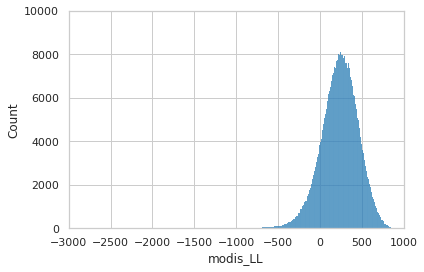

In [9]:
ax = sns.histplot(data=llc_table, x='modis_LL')
ax.set_xlim(-3000., 1000.)
ax.set_ylim(0., 10000.)

## LL LLC

(0.0, 10000.0)

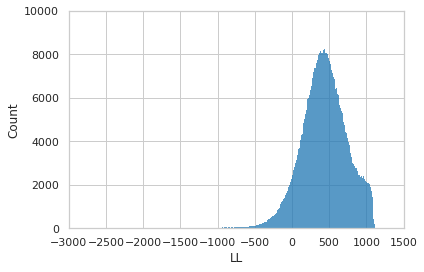

In [10]:
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-3000., 1500.)
ax.set_ylim(0., 10000.)

## LLC Scatter

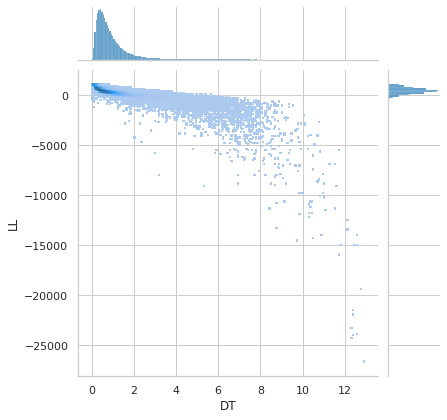

In [11]:
jg = sns.jointplot(data=llc_table, x='DT', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))

# Outliers

In [12]:
low_LL = llc_table.LL < -1000.

/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/xavier/Projects/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


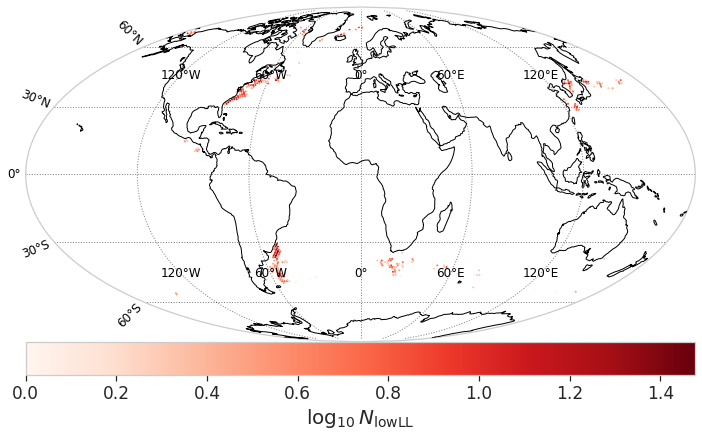

In [13]:
_ = ulmo_figs.show_spatial(llc_table[low_LL], lbl='low LL')